##  Regresión Lineal vs RN Perceptron multicapa

ejemplo de código que compara un modelo de regresión lineal múltiple con una red neuronal de perceptrón multicapa (MLP) utilizando Python y la biblioteca scikit-learn para el modelo de regresión lineal y TensorFlow/Keras para la red neuronal:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generar datos de ejemplo
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 muestras, 5 características
y = 2 * X[:, 0] + 3 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(100) * 0.1  # Modelo verdadero: 2x1 + 3x2 - 1.5x3 + ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal Múltiple
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_predictions = regression_model.predict(X_test)
regression_mse = mean_squared_error(y_test, regression_predictions)
print("Regresión Lineal Múltiple MSE:", regression_mse)

# Modelo de Red Neuronal Perceptrón Multicapa (MLP)
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(5,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
nn_predictions = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
print("Red Neuronal Perceptrón Multicapa MSE:", nn_mse)


Regresión Lineal Múltiple MSE: 0.008121631051716875
1/1 [==============================] - 0s 86ms/step
Red Neuronal Perceptrón Multicapa MSE: 0.06642645655040019


# Regresión logística vs Red neuronal

ejemplo que compara un modelo de regresión logística con una red neuronal para la clasificación utilizando el conjunto de datos Iris. Utilizaremos scikit-learn para la regresión logística y TensorFlow/Keras para la red neuronal.

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el conjunto de datos Iris
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Regresión Logística Accuracy:", logreg_accuracy)

# Modelo de Red Neuronal
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(3, activation='softmax')  # Para clasificación multiclase
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
nn_predictions = model.predict(X_test)
nn_predictions = np.argmax(nn_predictions, axis=1)  # Convertir probabilidades a etiquetas
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Red Neuronal Accuracy:", nn_accuracy)


Regresión Logística Accuracy: 1.0
1/1 [==============================] - 0s 45ms/step
Red Neuronal Accuracy: 0.9666666666666667


# Ejemplo Regresión logística vs Red Neuronal

ejemplo que compara un modelo de regresión logística con una red neuronal para la clasificación utilizando el conjunto de datos de dígitos escritos a mano, conocido como el conjunto de datos MNIST. Utilizaremos scikit-learn para la regresión logística y TensorFlow/Keras para la red neuronal.

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el conjunto de datos MNIST
mnist_data = fetch_openml("mnist_784", version=1)
X = mnist_data.data.astype("float32") / 255.0
y = mnist_data.target.astype("int")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Regresión Logística Accuracy:", logreg_accuracy)

# Modelo de Red Neuronal
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # Para clasificación multiclase de 10 dígitos
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)
nn_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Red Neuronal Accuracy:", nn_accuracy)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística Accuracy: 0.9202857142857143
Epoch 1/10
788/788 [==============================] - 4s 3ms/step - loss: 2.5233 - accuracy: 0.2962 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 2/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3102 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 3/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3072 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 4/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3048 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 5/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 6/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 7/10
788/788 [==============================] - 3s 3ms/step - loss: 2.3043 - accuracy: 0.0996

# Ejercicio: Comparación entre K-Nearest Neighbors (KNN) y Red Neuronal en el Conjunto de Datos Iris

## Enunciado:
Dado el conjunto de datos Iris, tu tarea es crear un modelo de clasificación utilizando el algoritmo K-Nearest Neighbors (KNN) y compararlo con un modelo de red neuronal utilizando TensorFlow/Keras. El objetivo es predecir la especie de iris en función de sus características.

## Pasos:

### Parte 1: Modelo KNN

- Carga el conjunto de datos Iris y divídelo en conjuntos de entrenamiento y prueba.
- Importa la clase KNeighborsClassifier de scikit-learn.
- Crea una instancia del clasificador KNN con un valor de n_neighbors (número de vecinos) de tu elección.
- Ajusta el modelo KNN a los datos de entrenamiento.
- Realiza predicciones en los datos de prueba.
- Evalúa el rendimiento del modelo KNN utilizando una métrica de tu elección (por ejemplo, precisión, matriz de confusión).

### Parte 2: Modelo de Red Neuronal

- Importa las bibliotecas necesarias: TensorFlow y keras.
- Crea un modelo de red neuronal utilizando la API secuencial de Keras.
- Agrega capas densas con funciones de activación y dropout (si lo deseas).
- Compila el modelo utilizando un optimizador y una función de pérdida adecuados.
- Ajusta el modelo a los datos de entrenamiento.
- Realiza predicciones en los datos de prueba.
- Evalúa el rendimiento del modelo utilizando la misma métrica que en el modelo KNN.


# Ejercicio: Comparación entre Decision Tree y Red Neuronal en el Conjunto de Datos de Vinos



## Enunciado:
Dado el conjunto de datos de vinos, tu tarea es crear un modelo de clasificación utilizando el algoritmo Decision Tree y compararlo con un modelo de red neuronal utilizando TensorFlow/Keras. El objetivo es predecir la clase del vino en función de sus características.

## Pasos:

#### Parte 1: Decision Tree

- Carga el conjunto de datos de vinos y divídelo en conjuntos de entrenamiento y prueba.
- Importa la clase DecisionTreeClassifier de scikit-learn.
- Crea una instancia del clasificador Decision Tree con los parámetros que consideres adecuados.
- Ajusta el modelo Decision Tree a los datos de entrenamiento.
- Realiza predicciones en los datos de prueba.
- Evalúa el rendimiento del modelo Decision Tree utilizando una métrica de tu elección (por ejemplo, precisión, matriz de confusión).

### Parte 2: Modelo de Red Neuronal

- Importa las bibliotecas necesarias: TensorFlow y keras.
- Carga el conjunto de datos y preprocesa los datos si es necesario.
- Crea un modelo de red neuronal utilizando la API secuencial de Keras.
- Agrega capas densas con funciones de activación y dropout (si lo deseas).
- Compila el modelo utilizando un optimizador y una función de pérdida adecuados.
- Ajusta el modelo a los datos de entrenamiento.
- Realiza predicciones en los datos de prueba.
- Evalúa el rendimiento del modelo utilizando la misma métrica que en el modelo Decision Tree.




# Ejemplo red neuronal convolutional (digitos a mano)

ejemplo básico de cómo construir una red neuronal convolucional (CNN) utilizando TensorFlow y Keras. Este ejemplo utiliza la popular base de datos MNIST, que consiste en imágenes de dígitos escritos a mano.

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1420 - accuracy: 0.9562 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0476 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 0.0451 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0329 - val_accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0322 -

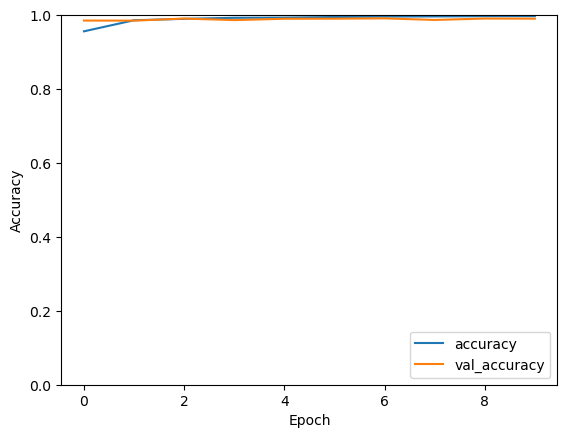

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Cargar y preprocesar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Agregar una dimensión extra para los canales (escala de grises)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Crear el modelo de CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Graficar la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Ejemplo red neuronal convolutional (imágenes a color)

Epoch 1/10
1563/1563 [==============================] - 33s 20ms/step - loss: 1.5253 - accuracy: 0.4439 - val_loss: 1.3192 - val_accuracy: 0.5250
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1698 - accuracy: 0.5855 - val_loss: 1.0846 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0183 - accuracy: 0.6416 - val_loss: 1.0291 - val_accuracy: 0.6381
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9267 - accuracy: 0.6741 - val_loss: 0.9391 - val_accuracy: 0.6671
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8551 - accuracy: 0.7013 - val_loss: 0.9156 - val_accuracy: 0.6843
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7937 - accuracy: 0.7207 - val_loss: 0.9324 - val_accuracy: 0.6780
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7460 - accuracy: 0.7373 - val_loss: 0.8782 -

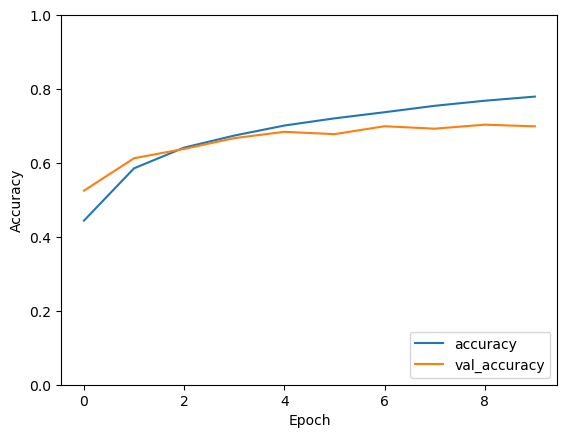

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Cargar y preprocesar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Crear el modelo de CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Graficar la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Ejemplo de cómo implementar una Red Neuronal Residual (ResNet) utilizando TensorFlow y Keras

ResNet es una arquitectura de red neuronal profunda que utiliza conexiones residuales para mitigar el problema de la degradación del rendimiento a medida que las redes se vuelven más profundas.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

def residual_block(x, filters, kernel_size=3, stride=1):
    identity = x
    
    # Primer bloque convolucional
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Segundo bloque convolucional
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Conexión residual
    if stride != 1 or identity.shape[-1] != filters:
        identity = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(identity)
        identity = layers.BatchNormalization()(identity)
    
    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x

# Crear el modelo ResNet
input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=input_shape)
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

num_blocks_list = [2, 2, 2, 2]  # Número de bloques en cada etapa
filters_list = [64, 128, 256, 512]  # Número de filtros en cada etapa

for stage, num_blocks, filters in zip(range(4), num_blocks_list, filters_list):
    stride = 1 if stage == 0 else 2
    for _ in range(num_blocks):
        x = residual_block(x, filters, stride=stride)
        stride = 1

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1000, activation='softmax')(x)

resnet_model = models.Model(inputs, outputs)

# Resumen del modelo
resnet_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 112, 112, 64)         9472      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_20 (Ba  (None, 112, 112, 64)         256       ['conv2d_26[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_17 (ReLU)             (None, 112, 112, 64)         0         ['batch_normalization_20

                                                                                                  
 re_lu_24 (ReLU)             (None, 28, 28, 128)          0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_35 (Conv2D)          (None, 28, 28, 128)          147584    ['re_lu_24[0][0]']            
                                                                                                  
 batch_normalization_29 (Ba  (None, 28, 28, 128)          512       ['conv2d_35[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 add_11 (Add)                (None, 28, 28, 128)          0         ['batch_normalization_29[0][0]
          

                                                                                                  
 conv2d_44 (Conv2D)          (None, 7, 7, 512)            2359808   ['re_lu_31[0][0]']            
                                                                                                  
 batch_normalization_38 (Ba  (None, 7, 7, 512)            2048      ['conv2d_44[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_32 (ReLU)             (None, 7, 7, 512)            0         ['batch_normalization_38[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_45 (Conv2D)          (None, 7, 7, 512)            2359808   ['re_lu_32[0][0]']            
          